Found 40079 files belonging to 10 classes.
Found 9921 files belonging to 10 classes.
Epoch 1/20
1253/1253 [==============================] - 118s 93ms/step - loss: 2.1069 - accuracy: 0.2334 - val_loss: 2.0329 - val_accuracy: 0.2676
Epoch 2/20
1253/1253 [==============================] - 23s 18ms/step - loss: 1.9930 - accuracy: 0.2906 - val_loss: 1.9789 - val_accuracy: 0.3012
Epoch 3/20
1253/1253 [==============================] - 23s 18ms/step - loss: 1.9332 - accuracy: 0.3164 - val_loss: 1.9188 - val_accuracy: 0.3207
Epoch 4/20
1253/1253 [==============================] - 23s 18ms/step - loss: 1.8880 - accuracy: 0.3330 - val_loss: 1.8853 - val_accuracy: 0.3313
Epoch 5/20
1253/1253 [==============================] - 23s 18ms/step - loss: 1.8520 - accuracy: 0.3468 - val_loss: 1.8546 - val_accuracy: 0.3492
Epoch 6/20
1253/1253 [==============================] - 18s 14ms/step - loss: 1.8222 - accuracy: 0.3543 - val_loss: 1.8755 - val_accuracy: 0.3254
Epoch 7/20
1253/1253 [================

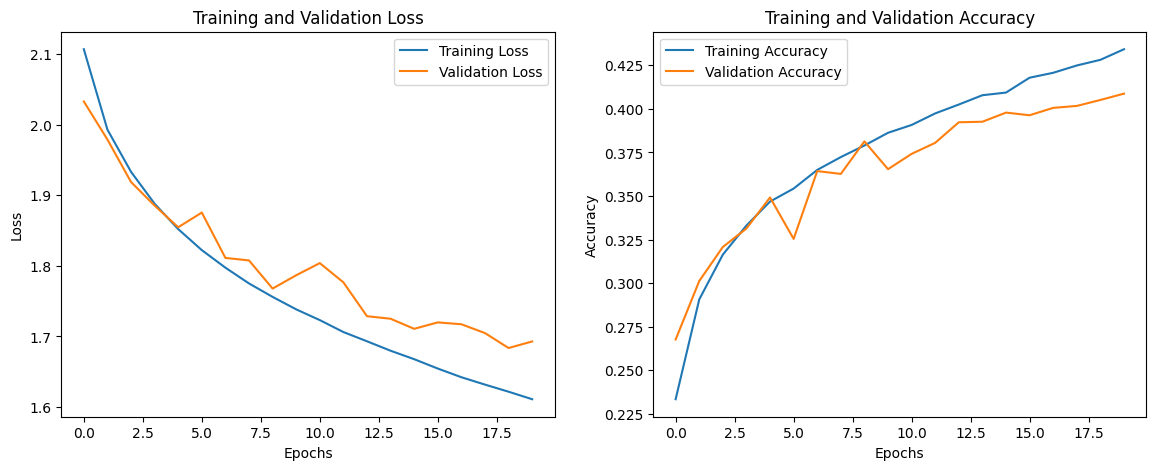

In [1]:
# a. Import the necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

# b. Load the training and testing data from the directory
# Paths to train and test directories
train_dir = './cifar-10-img/train'
test_dir = './cifar-10-img/test'

# Load images with Keras
train_dataset = image_dataset_from_directory(
    train_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(28, 28),
    color_mode="grayscale",
    batch_size=32
)

# Normalize images to the range [0, 1]
def normalize_images(image, label):
    return image / 255.0, label

train_dataset = train_dataset.map(normalize_images)
test_dataset = test_dataset.map(normalize_images)

# c. Define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),   # Flatten input images (28x28 pixels) into a 1D vector
    Dense(128, activation='relu'),      # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),       # Hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')     # Output layer with 10 units (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# d. Train the model using SGD
history = model.fit(train_dataset, epochs=20, validation_data=test_dataset)

# e. Evaluate the network
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# f. Plot the training loss and accuracy
# Extract loss and accuracy values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label="Training Accuracy")
plt.plot(val_accuracy, label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()